#### ARTI 402 – Programming for AI (Assignment)
# Building a Basic Sentiment Analyzer with Python and TextBlob
____________________________________________________________________________________________


## Assessment Goal
The goal of this assessment is to design a simple text sentiment analyzer using Python and TextBlob.

## Assessment Weight
15% out of the total mark allocated for the course.

## Assessment Type
This is a **group** “practical” assignment, which means each group is expected to work on the assignment requirements on their own and submit their work based on their own efforts. Each group consists of **3-4 students**.
Assessment Specifications and Description
As the name suggests, sentiment analysis means to identify the view or emotion behind a situation. It basically means to analyze and find the emotion or intent behind a piece of text or speech or any mode of communication. In this Assessment, we will focus on the sentiment analysis of text data.
__________________________________________________________________________________________________

We, humans, communicate with each other in a variety of languages, and any language is just a mediator or a way in which we try to express ourselves. And, whatever we speak or write, has a sentiment associated with it. It might be positive or negative or it might be neutral as well.

Sentiment analysis has a wide range of applications across various industries. One of its most common uses is in the field of social media monitoring, where companies and brands leverage sentiment analysis to gain insights into customer opinions and reactions to their products or services. This information can help them make data-driven decisions, refine marketing strategies, and improve customer satisfaction. Sentiment analysis is also valuable in the financial sector, where it is used to analyze market sentiment and news sentiment to make more informed investment decisions. In the realm of customer support, sentiment analysis can be employed to gauge customer satisfaction and identify potential issues in real-time, allowing businesses to respond proactively. Moreover, sentiment analysis has applications in healthcare, politics, and even in the field of academic research to analyze public sentiment, assess public policies, and understand emotional trends within specific domains. Overall, sentiment analysis is a versatile tool that provides valuable insights into human emotions and opinions, making it applicable in a wide array of fields.

A simple sentiment analyzer can be built using TextBlob. TextBlob is a popular Python library for natural language processing (NLP) that simplifies the complexities of working with textual data. It offers a straightforward and user-friendly interface for various NLP tasks, including text classification, part-of-speech tagging, sentiment analysis, translation, and more. TextBlob is built on top of NLTK and Pattern, two other NLP libraries, making it easy to perform common NLP operations with just a few lines of code. It also provides a range of pre-trained models and datasets, making it accessible for users without extensive NLP expertise. Whether you need to analyze sentiment in customer reviews, categorize text documents, or perform basic language processing tasks, TextBlob is a versatile and efficient tool that simplifies NLP tasks in Python.

In this assessment, you are asked to develop an intelligent solution which classifies the sentiment in Amazon reviews. A potential user of the solution is a producer or a seller on Amazon who would like to analyze their product’s reviews.

# Dataset Description
In this assessment, you will use a dataset of Amazon reviews of unlocked phone. PromptCloud extracted 400 thousand reviews of unlocked mobile phones sold on Amazon.com to find out insights with respect to reviews, ratings, price and their relationships.

*You may access the dataset via this link https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones*

## Tools and libraries:
In this assessment, you will use the following tools and libraries:‎
- Python
- Pandas
- TextBlob

## Assessment Tasks

### Task1:

Write a Python function called `sentimentAnalyzer(text)`. This function takes a text (i.e review) and returns the sentiment as follow:

- Score < -0.2: returns **‘Negative’**
- Score between -0.2 and 0.2: returns **‘Neutral’**
- Score > 0.2: returns **‘Positive’**

The score is the polarity of text as determined by TextBlob. An example of creating a textblob object is:

`blob = TextBlob(text)`

*(Refer to TextBlob’s documentation to learn about determining polarity)*


In [55]:
from textblob import TextBlob

def sentimentAnalyzer(text):
    blob = TextBlob(text)
    score = blob.sentiment.polarity

    if score < -0.2:
        return 'Negative'
    elif score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'

print(sentimentAnalyzer("I hate this phone!"))
print(sentimentAnalyzer("nothing special."))
print(sentimentAnalyzer("I like this phone!"))

Negative
Positive
Neutral


### Task 2:
Verify that the function does classify the sentiment correctly by passing the following words to the function:


|   Word        | Polarity | Resulting Sentiment |
|:-------------:|:--------:|:-------------------:|
| happy         |   0.8    |      Positive       |
| exciting      |   0.3    |      Positive       |
| good          |   0.7    |      Positive       |
| rich          |  0.375   |      Positive       |
| smile         |   0.3    |      Positive       |
| sad           |  -0.5    |      Negative       |
| disappointed  | -0.75    |      Negative       |
| bad           | -0.699   |      Negative       |
| poor          |  -0.4    |      Negative       |
| anger         |  -0.7    |      Negative       |
| food          |   0      |      Neutral        |
| animal        |   0      |      Neutral        |

In [56]:
words = [
    "happy", "exciting", "good", "rich", "smile",
    "sad", "disappointed", "bad", "poor", "anger",
    "food", "animal"
]

for word in words:
    print(word, "\t|", TextBlob(word).sentiment.polarity, "\t|", sentimentAnalyzer(word))



happy 	| 0.8 	| Positive
exciting 	| 0.3 	| Positive
good 	| 0.7 	| Positive
rich 	| 0.375 	| Positive
smile 	| 0.3 	| Positive
sad 	| -0.5 	| Negative
disappointed 	| -0.75 	| Negative
bad 	| -0.6999999999999998 	| Negative
poor 	| -0.4 	| Negative
anger 	| -0.7 	| Negative
food 	| 0.0 	| Neutral
animal 	| 0.0 	| Neutral


### Task 3:
Import the provided dataset into a Pandas DataFrame. Filter the data to only include one product of your choice. The product you select must have at least 1000 reviews. Then, describe the data related to your product. This includes:

- Product name
- Number of rows
- Number of columns
- Length of the shortest review, length of the longest review, and the average length of the review. ‎

In [57]:
import pandas as pd

df = pd.read_csv("Amazon_Unlocked_Mobile.csv", engine="python", on_bad_lines="skip")

product_col = "Product Name"
review_col = "Reviews"

# count reviews per product
product_counts = df.groupby(product_col).size().sort_values(ascending=False)

# show top 10 products
print(product_counts.head(20))


print("---------------------------------------\n")

chosen_product = product_counts[product_counts >= 1000].index[6]
print("Chosen product:", chosen_product)

df_product = df[df[product_col] == chosen_product].copy()

print("Number of rows (reviews):", len(df_product))
print("Number of columns:", df_product.shape[1])

# create a new column with length of each review
df_product["review_length"] = df_product[review_col].astype(str).str.len()

shortest = df_product["review_length"].min()
longest = df_product["review_length"].max()
average = df_product["review_length"].mean()

print("---------------------------------------\n")

print("Product name:", chosen_product)
print("Number of rows:", len(df_product))
print("Number of columns:", df_product.shape[1])
print("Length of the shortest review length: ", shortest)
print("Length of the longest review: ", longest)
print("Length of the average review :", round(average, 2))


Product Name
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)          1451
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)       1241
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                                 1194
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink         1129
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone                   1127
Apple iPhone 5s 32GB (Silver) - AT&T                                                          1118
BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- US GSM Unlocked - Grey            1111
Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black        1109
Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White    1108
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White           10

### Task 4:
Apply the function sentimentAnalyzer(text)to the text column in your dataframe. This should create a new column in the dataframe called (Sentiment) which includes the sentiment for each review.

In [58]:

df_product["Reviews"] = df_product["Reviews"].astype(str)
df_product["Sentiment"] = df_product["Reviews"].apply(sentimentAnalyzer)

df_product.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,review_length,Sentiment
119791,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.0,5,I bought this for my son and he loves his phon...,0.0,71,Neutral
119792,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.0,5,GOOD.,0.0,5,Positive
119793,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.0,4,I love the gold look. I have gone without char...,0.0,123,Positive
119794,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.0,4,Great Battery. All day long,0.0,27,Positive
119795,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.0,4,I send it to Africa so no idea is working but ...,0.0,53,Positive


### Task 5:
Using visualization and summative statistics (in pandas and matlibplot), describe the results of the sentiment analysis of your product and analyze the results. This should include:

- Visualizations of the results. For example, a bar chart showing number of documents with positive, negative, and neutral sentiment. Include any visualization you think is helpful.


Sentiment
Positive    646
Neutral     415
Negative     50
Name: count, dtype: int64


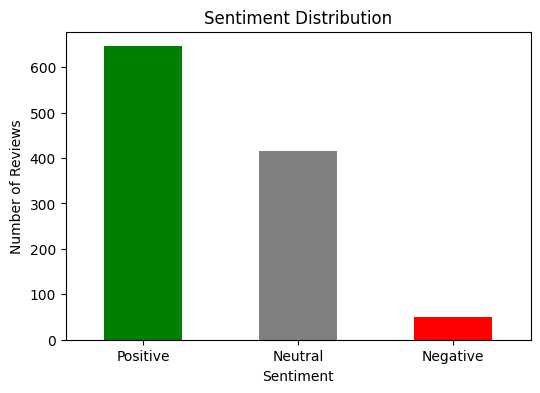

In [59]:
import matplotlib.pyplot as plt

# Count the sentiments
sent_counts = df_product["Sentiment"].value_counts()
print(sent_counts)

# Bar chart
plt.figure(figsize=(6,4))
sent_counts.plot(kind="bar", color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()


- Examples of reviews with positive, negative, and neural sentiment along with their polarity.


In [60]:
df_product["Polarity"] = df_product["Reviews"].apply(
    lambda x: round(TextBlob(x).sentiment.polarity, 3)
)


### Exmaple: Positive review ✅

In [61]:
positive_examples = df_product[df_product["Sentiment"] == "Positive"] \
    [["Reviews", "Polarity"]]

positive_examples.head(10)


,Reviews,Polarity
119792,GOOD.,0.700
119793,I love the gold look. I have gone without char...,0.354
119794,Great Battery. All day long,0.375
119795,I send it to Africa so no idea is working but ...,0.350
119796,i love the desing and the theme but i felt lik...,0.233
119798,"I love the phone. It looks really good, howeve...",0.600
119800,Excellent,1.000
119801,Price / quality is great,0.800
119802,"I loved the looks of the phone, it was beautif...",0.387
119803,This phone does everything that I want my phon...,0.278


### Exmaple: Neutral review 🟫

In [62]:
neutral_examples = df_product[df_product["Sentiment"] == "Neutral"] \
    [["Reviews", "Polarity"]]
neutral_examples.head(10)


,Reviews,Polarity
119791,I bought this for my son and he loves his phon...,0.000
119797,audio on phone very low and raspy had to retur...,0.000
119799,Congratulecion,0.000
119805,This phone sucked the only cool thing was its ...,0.175
119806,I never write reviews..but I'm pretty disappoi...,0.128
119807,"For the most part it is a great phone, there i...",0.121
119811,Great phone. Very responsive. Literally takes ...,0.157
119813,Just like expected,-0.100
119818,A+,0.000
119819,"EDIT: Never mind, the battery sucks, I left it...",0.042


### Exmaple: Negative review ❌





In [63]:
negative_examples = df_product[df_product["Sentiment"] == "Negative"] \
    [["Reviews", "Polarity"]]

negative_examples.head(30)


,Reviews,Polarity
119825,I hate the ads that come with this product. RE...,-0.800
119831,Front camera is horrible,-1.000
119847,This phone is horrible the speaker and volume ...,-0.500
119849,The battery is terrible! . I have to recharge ...,-1.000
119857,the Worst dont buy it Please,-1.000
119858,Worst phone I ever used!!! Want to give it zer...,-0.267
119937,Really slow. I usually have no problems with b...,-0.275
119940,This is not a good phone. Bought this phone no...,-0.350
119946,The charging port malfunctioned under two mont...,-0.325
119958,Horrible! Slow and frozen!,-0.688


- Insights on what your client (producer or seller) need to do to minimize the negative sentiment and improve their reputation and product.

based on example of negative reviews, its recommended for the seller to minimize the negative sentiment to fix:
- front camera quality
- speaker performance
- microphone performance
- the battery health of the phone
- clearify the size of the phone for customers




- Examples of reviews where you think TextBlob might have assigned the wrong sentiment to the review. Explain why you think this happened. Note: You may use the rating column to assess TextBlob’s sentiment.

In [64]:
def rating_to_sentiment(r):
    if r >= 4:
        return "Positive"
    elif r <= 2:
        return "Negative"
    else:
        return "Neutral"

df_product["RatingSentiment"] = df_product["Rating"].apply(rating_to_sentiment)


In [65]:
mismatched = df_product[df_product["Sentiment"] != df_product["RatingSentiment"]]


In [66]:
sample_errors = mismatched.sample(5, random_state=4)
sample_errors[["Rating", "Polarity", "Sentiment", "RatingSentiment", "Reviews"]]


,Rating,Polarity,Sentiment,RatingSentiment,Reviews
119956,5,-0.167,Neutral,Positive,"Arrived on time. No phone issues, so far.Updat..."
120519,5,0.100,Neutral,Positive,Great phone. Operates like my tablet so there ...
120279,2,0.000,Neutral,Negative,Volume is too low you can barley hear it while...
120529,1,0.000,Neutral,Negative,My phone just stopped working
119961,1,0.000,Neutral,Negative,Front camera don't work give me a error


In [67]:
mismatched = df_product[df_product["Sentiment"] != df_product["RatingSentiment"]]

print("Number of mismatched reviews:", len(mismatched))

mismatched[["Rating", "Polarity", "Sentiment", "RatingSentiment", "Reviews"]].head(10)


Number of mismatched reviews: 422


,Rating,Polarity,Sentiment,RatingSentiment,Reviews
119791,5,0.000,Neutral,Positive,I bought this for my son and he loves his phon...
119797,2,0.000,Neutral,Negative,audio on phone very low and raspy had to retur...
119799,5,0.000,Neutral,Positive,Congratulecion
119805,1,0.175,Neutral,Negative,This phone sucked the only cool thing was its ...
119806,2,0.128,Neutral,Negative,I never write reviews..but I'm pretty disappoi...
119807,2,0.121,Neutral,Negative,"For the most part it is a great phone, there i..."
119811,4,0.157,Neutral,Positive,Great phone. Very responsive. Literally takes ...
119813,5,-0.100,Neutral,Positive,Just like expected
119818,5,0.000,Neutral,Positive,A+
119819,1,0.042,Neutral,Negative,"EDIT: Never mind, the battery sucks, I left it..."


In [68]:
mismatched_sample = mismatched.sample(5, random_state=6)
mismatched_sample[["Rating", "Polarity", "Sentiment", "RatingSentiment", "Reviews"]]


,Rating,Polarity,Sentiment,RatingSentiment,Reviews
120418,1,0.010,Neutral,Negative,Battery doesn't last anywhere near as long as ...
120503,5,0.136,Neutral,Positive,I absutley live it.
120772,4,0.018,Neutral,Positive,A bit laggy when going in between apps but the...
120736,4,0.100,Neutral,Positive,I like it so far
120188,1,0.000,Neutral,Negative,Speak speak alone


### Wrong sentiment examples

- The rating: 1
- The polarity: 0.01
- The sentiment: Neutral
- The review text: "Battery doesn't last anywhere near as long as it says. Doesn't even last any longer than my last phone."
- explanation: TextBlob relies on emotional words to determine sentiment. This review does not use any emottional word
---

- The rating: 5
- The polarity: 0.136
- The sentiment: Neutral
- The review text: “I absutley live it."
- explanation: typo of the word love
---

- The rating: 4
- The polarity: 0.018
- The sentiment: Neutral
- The review text: “A bit laggy when going in between apps but the battery does last quite a long time. The longest I've had a BLU phone that didn't end up being returned due to defects.Camera takes decent pics and clear video."
- explanation: the review contain a mix of positive and negative comments even though it has a positive rating

---

- The rating: 4
- The polarity: 0.1
- The sentiment: Neutral
- The review text: "I like it so far"
- explanation: simple words that gave low polarity
---


- The rating: 1
- The polarity: 0.0
- The sentiment: Neutral
- The review text: "Speak speak alone"
- explanation: doesn’t have any emotional words so TextBlob gave it neutral sentiment even with only 1 rating
---

### Task 6


Export the dataframe to a csv file.

In [69]:
df_product.to_csv("sentiment_results.csv", index=False)


### Task 7
Write a technical report explaining the problem and outlining your results. Your ‎report should have the following:‎

- Title page
- Introduction
- Problem statement
- AI Solution
- Use case (the product you selected with the analysis results)‎
- Alignment between AI solution and client’s needs*‎
- Conclusion

* Your report must include a section which explains how the intelligent solution aligns with the client’s needs and requirements that are specified in the instructions (this document).


## Assessment Deadline:
The assignment is due: Thursday, December 4th , 2025.
## Assessment Deliverables:
You need to submit the complete notebook, your csv file (task 6), and assessment report.


@ 2025